# CNN 모델 학습 시각화 
## 은닉층 출력(Activation) 시각화

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github

* 'cat.1700.jpg' 파일 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/cat.1700.jpg

--2023-03-25 01:50:38--  https://raw.githubusercontent.com/rusita-ai/pyData/master/cat.1700.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20066 (20K) [image/jpeg]
Saving to: ‘cat.1700.jpg’

cat.1700.jpg        100%[===================>]  19.60K  --.-KB/s    in 0.001s  

2023-03-25 01:50:38 (16.5 MB/s) - ‘cat.1700.jpg’ saved [20066/20066]



* '002_dogs_and_cats_small.h5' 파일 다운로드

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/002_dogs_and_cats_small.h5

--2023-03-25 01:50:39--  https://raw.githubusercontent.com/rusita-ai/pyData/master/002_dogs_and_cats_small.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41500888 (40M) [application/octet-stream]
Saving to: ‘002_dogs_and_cats_small.h5’

002_dogs_and_cats_s 100%[===================>]  39.58M   156MB/s    in 0.3s    

2023-03-25 01:50:40 (156 MB/s) - ‘002_dogs_and_cats_small.h5’ saved [41500888/41500888]



* 다운로드 결과 확인

In [4]:
!ls -l 

total 40556
-rw-r--r-- 1 root root 41500888 Mar 25 01:50 002_dogs_and_cats_small.h5
-rw-r--r-- 1 root root    20066 Mar 25 01:50 cat.1700.jpg
drwxr-xr-x 1 root root     4096 Mar 23 18:57 sample_data


# II. 사전 학습된 모델 사용

> ## 1) Model Load

* '002_dogs_and_cats_small.h5'

In [5]:
from tensorflow.keras.models import load_model

model = load_model('/content/002_dogs_and_cats_small.h5')

> ## 2) Model Summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# III. 시각화용 고양이 이미지

> ## 1) 고양이 이미지 선택

* 'cat.1700.jpg'

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/cat.1700.jpg'

img = image.load_img(img_path, target_size = (150, 150))

> ## 2) Image Reshape & Normalization

In [8]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)

img_tensor = img_tensor / 255.

print(img_tensor.shape)

(1, 150, 150, 3)


> ## 3) Visualization

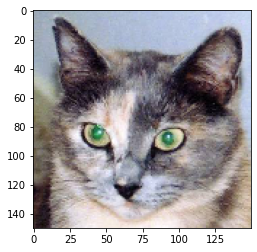

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

# IV. 상위 8개 Layer 추출

> ## 1) 입력에 대해 8개 층 출력 반환

In [10]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

> ## 2) activation_model Summary

In [11]:
activation_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

# V. activation_model 적용

> ## 1) predict( )

In [12]:
activations = activation_model.predict(img_tensor, verbose = 0)

> ## 2) First Layer
* 148 x 148 Feature_Map with 32_Channels

In [13]:
first_layer_activation = activations[0]

print(first_layer_activation.shape)

(1, 148, 148, 32)


> ## 3) 12_Feature_Map

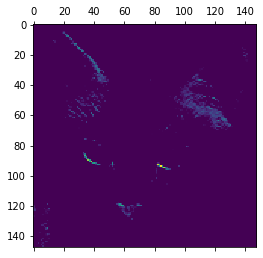

In [14]:
plt.matshow(first_layer_activation[0, :, :, 12], cmap = 'viridis')
plt.show()

> ## 4) 20_Feature_Map

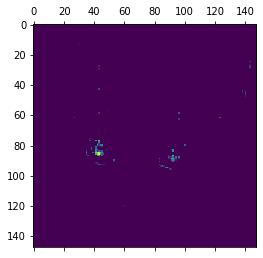

In [15]:
plt.matshow(first_layer_activation[0, :, :, 20], cmap = 'viridis')
plt.show()

> ## 5) 26_Feature_Map

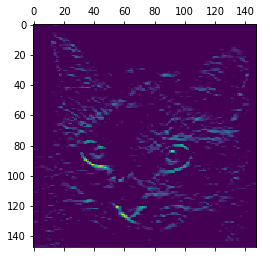

In [16]:
plt.matshow(first_layer_activation[0, :, :, 26], cmap = 'viridis')
plt.show()

> ## 6) 29_Feature_Map

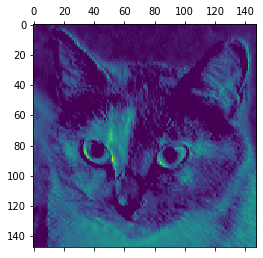

In [17]:
plt.matshow(first_layer_activation[0, :, :, 29], cmap = 'viridis')
plt.show()

# VI. 전체 레이어 특징 추출

> ## 1) drawFeatureMap( ) 정의

In [18]:
def drawFeatureMap(activations):
  # Layer 이름을 그래프 제목으로 사용
  layer_names = []
  for layer in model.layers[:8]:
      layer_names.append(layer.name)

  images_per_row = 16
  
  for layer_name, layer_activation in zip(layer_names, activations):
      # 특성 맵에 있는 특성의 수
      n_features = layer_activation.shape[-1]

      # 특성 맵의 크기 (1, size, size, n_features)
      size = layer_activation.shape[1]

      # 활성화 채널을 위한 그리드 크기 계산
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      # 각 활성화를 하나의 큰 그리드 채우기
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                               :, :,
                                               col * images_per_row + row]
              # 그래프로 나타내기 좋게 특성을 처리
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

      # 그리드 출력
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

  plt.show()

> ## 2) drawFeatureMap( ) 실행

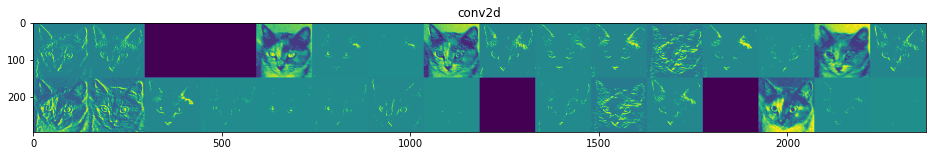

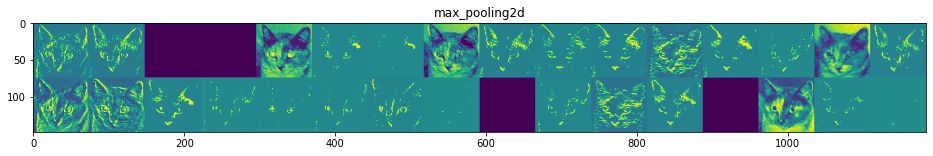

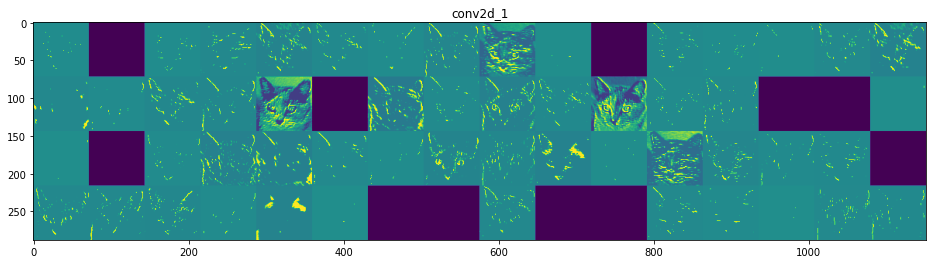

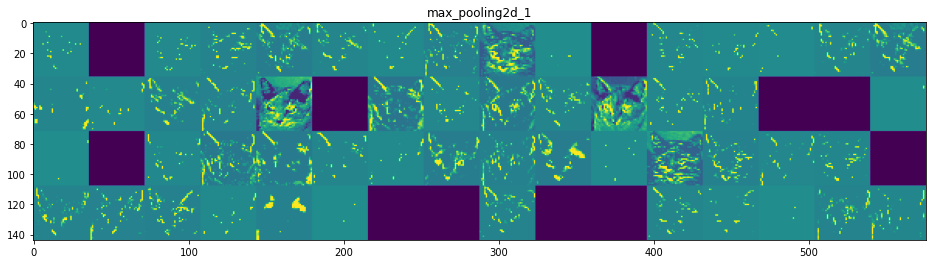

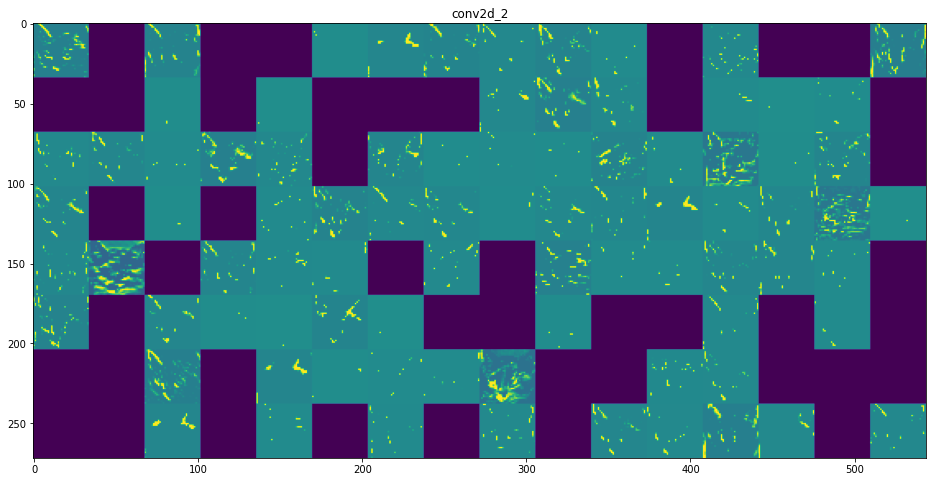

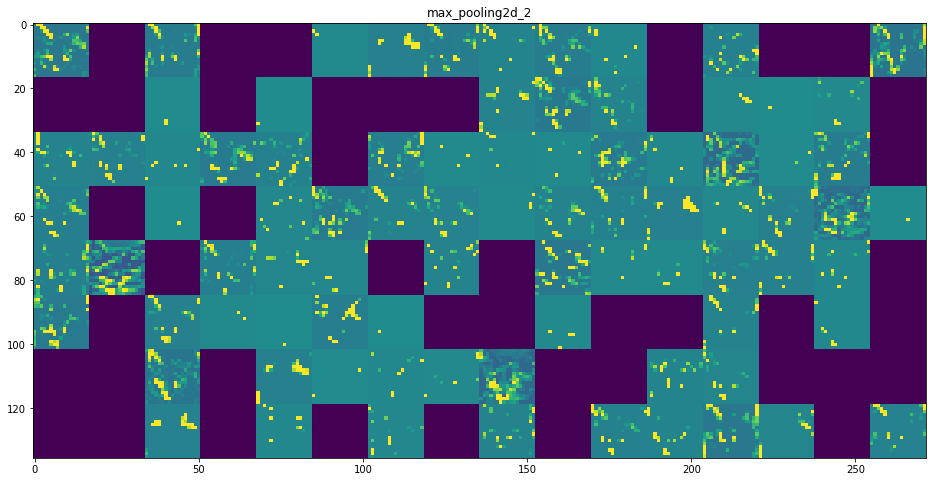

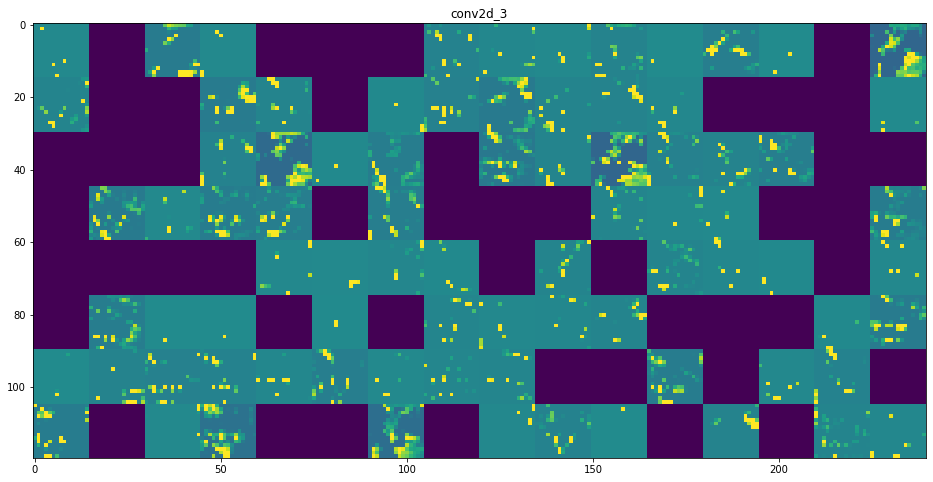

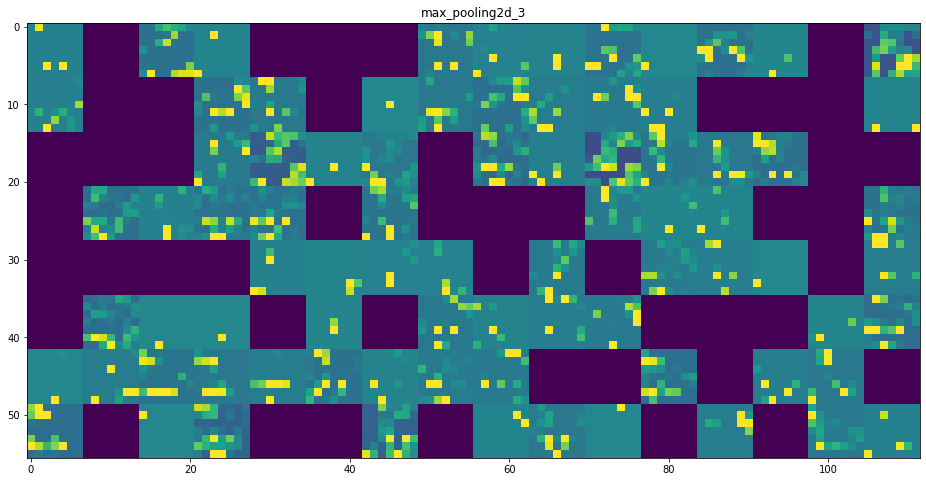

In [19]:
drawFeatureMap(activations)

# 
# 
# 
# The End
# 
# 
# 